# 📘 EDA Visual: Flujos Migratorios Mixtos hacia Europa (2024)

Este cuaderno muestra un **Análisis Exploratorio de Datos (EDA)** centrado en **visualizaciones básicas** para entender mejor los flujos migratorios hacia Europa.

Dataset 1: `DTM_Mixed Migration Flows to Europe_Yearly_2024_1.xlsx` 
Dataset 2:  `DTM_Mixed Migration Flows to Europe_Yearly_2024_1.xlsx`
Hoja: `First_Arrival_Countries_CoO`


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Librerías de Visualización de Datos

**Matplotlib** es la librería fundamental para crear visualizaciones en Python. El módulo `pyplot` facilita la creación de gráficos.

- **Uso principal**: Crear gráficos básicos (líneas, barras, dispersión, histogramas)
- **Ventajas**: Control total sobre cada elemento del gráfico, altamente personalizable
- **Sintaxis común**: `plt.plot()`, `plt.scatter()`, `plt.bar()`, `plt.show()`


**Seaborn** es una librería construida sobre Matplotlib que facilita la creación de gráficos estadísticos atractivos y modernos.

- **Uso principal**: Visualizaciones estadísticas con diseño elegante por defecto
- **Ventajas**: 
  - Temas y paletas de colores profesionales integradas
  - Funciones especializadas para análisis exploratorio
  - Mejor manejo de DataFrames de pandas
- **Sintaxis común**: `sns.histplot()`, `sns.scatterplot()`, `sns.heatmap()`, `sns.boxplot()`

**Relación entre ambas**: Seaborn complementa a Matplotlib, añadiendo funcionalidad estadística y estética mejorada, pero ambas trabajan juntas perfectamente.

In [28]:
plt.style.use("seaborn-v0_8-pastel")

## Configuración de Estilo Visual

### plt.style.use("seaborn-v0_8-pastel")

Esta línea configura el **estilo visual global** de todos los gráficos de Matplotlib para que utilicen el tema **"seaborn-v0_8-pastel"**.

**¿Qué hace?**
- Aplica un esquema de colores y diseño
- Afecta a todos los gráficos creados después de esta instrucción

**Otros estilos populares:**
- `"seaborn"` - estilo limpio y minimalista
- `"classic"` - aspecto tradicional de Matplotlib
- `"dark_background"` - fondo oscuro
- `"fivethirtyeight"` - inspirado en el sitio de análisis estadístico

> 💡 **Tip**: Puedes ver todos los estilos disponibles con `plt.style.available`
En esta web puedes verlos: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

## 1. 📂 Carga de datos

In [29]:

# Cargar dataset
df1 = pd.read_excel(r"C:\Users\amval\Documents\bootcamp_ug\data_bootcamp\EDA\data\DTM_Mixed Migration Flows to Europe_Yearly_2023_1.xlsx",
                   sheet_name="First_Arrival_Countries_CoO")
df2 = pd.read_excel(r"C:\Users\amval\Documents\bootcamp_ug\data_bootcamp\EDA\data\DTM_Mixed Migration Flows to Europe_Yearly_2024_1.xlsx",
                   sheet_name="First_Arrival_Countries_CoO")


In [30]:
#Comparamos estructura antes de unir
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2302 entries, 0 to 2301
Data columns (total 6 columns):
 #   Column                                                                                                                                                                                                              Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                              --------------  ----- 
 0   Unnamed: 0                                                                                                                                                                                                          2300 non-null   object
 1   Unnamed: 1                                                                                                                                                               

In [31]:
df1.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Information on origin is based on the nationality declared by migrants as reported by the national authorities. \nAny monthly update from national authorities may include adjustments to data for previous months.,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Date,ISO3 - Country of origin,Monthly arrivals,ISO3 - Country of arrival,Source,Route
3,2023-01-31 00:00:00,AFG,353,BGR,Bulgarian Ministry of Interior,EMR
4,2023-01-31 00:00:00,SYR,162,BGR,Bulgarian Ministry of Interior,EMR


In [32]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1689 entries, 0 to 1688
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       1689 non-null   datetime64[ns]
 1   Year                       1689 non-null   int64         
 2   Month                      1689 non-null   int64         
 3   ISO3 - Country of origin   1689 non-null   object        
 4   ISO3 - Country of arrival  1689 non-null   object        
 5   Route                      1689 non-null   object        
 6   Arrivals                   1689 non-null   int64         
 7   Source                     1689 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 105.7+ KB


Transformaciones sobre df1 para que coincida con df2

In [33]:
# Eliminamos las dos primeras filas y establecemos la tercera como encabezado
df1.columns = df1.iloc[2]
df1 = df1.drop([0, 1, 2]).reset_index(drop=True)

In [34]:
df1

2,Date,ISO3 - Country of origin,Monthly arrivals,ISO3 - Country of arrival,Source,Route
0,2023-01-31 00:00:00,AFG,353,BGR,Bulgarian Ministry of Interior,EMR
1,2023-01-31 00:00:00,SYR,162,BGR,Bulgarian Ministry of Interior,EMR
2,2023-01-31 00:00:00,MAR,77,BGR,Bulgarian Ministry of Interior,EMR
3,2023-01-31 00:00:00,TUR,6,BGR,Bulgarian Ministry of Interior,EMR
4,2023-01-31 00:00:00,IRN,4,BGR,Bulgarian Ministry of Interior,EMR
...,...,...,...,...,...,...
2294,2023-12-02 00:00:00,PAK,12,MLT,"Ministry of Home Affairs, Security, Reforms an...",CMR
2295,2023-12-02 00:00:00,EGY,6,MLT,"Ministry of Home Affairs, Security, Reforms an...",CMR
2296,2023-12-02 00:00:00,BGD,5,MLT,"Ministry of Home Affairs, Security, Reforms an...",CMR
2297,2023-12-02 00:00:00,ERI,4,MLT,"Ministry of Home Affairs, Security, Reforms an...",CMR


In [35]:
df1.columns

Index(['Date', 'ISO3 - Country of origin', 'Monthly arrivals',
       'ISO3 - Country of arrival', 'Source', 'Route'],
      dtype='object', name=2)

In [36]:
df2.columns

Index(['Date', 'Year', 'Month', 'ISO3 - Country of origin',
       'ISO3 - Country of arrival', 'Route', 'Arrivals', 'Source'],
      dtype='object')

In [41]:
#Creamos las columnas Year y Month a partir de Date
#Primero ajustamos el tipo de dato de la columna Date
df1['Date'] = pd.to_datetime(df1['Date'])


In [42]:
df1['Year'] = df1['Date'].dt.year
df1['Month'] = df1['Date'].dt.month

In [43]:
#Renombramos columna para que sea idéntica a df2
df1 = df1.rename(columns={'Monthly arrivals': 'Arrivals'})

In [47]:
df1.columns

Index(['Date', 'Year', 'Month', 'ISO3 - Country of origin',
       'ISO3 - Country of arrival', 'Route', 'Arrivals', 'Source'],
      dtype='object', name=2)

In [48]:
df2.columns

Index(['Date', 'Year', 'Month', 'ISO3 - Country of origin',
       'ISO3 - Country of arrival', 'Route', 'Arrivals', 'Source'],
      dtype='object')

In [46]:
# Reordenamos las columnas de df1 para que coincidan con el orden de df2
df1 = df1[['Date', 'Year', 'Month', 'ISO3 - Country of origin', 'ISO3 - Country of arrival', 'Route', 'Arrivals', 'Source']]
df1.head()

2,Date,Year,Month,ISO3 - Country of origin,ISO3 - Country of arrival,Route,Arrivals,Source
0,2023-01-31,2023,1,AFG,BGR,EMR,353,Bulgarian Ministry of Interior
1,2023-01-31,2023,1,SYR,BGR,EMR,162,Bulgarian Ministry of Interior
2,2023-01-31,2023,1,MAR,BGR,EMR,77,Bulgarian Ministry of Interior
3,2023-01-31,2023,1,TUR,BGR,EMR,6,Bulgarian Ministry of Interior
4,2023-01-31,2023,1,IRN,BGR,EMR,4,Bulgarian Ministry of Interior


In [49]:
#Unimos los dos df
df_arrivals = pd.concat([df1, df2], ignore_index=True)

In [50]:
df_arrivals

,Date,Year,Month,ISO3 - Country of origin,ISO3 - Country of arrival,Route,Arrivals,Source
0,2023-01-31,2023,1,AFG,BGR,EMR,353,Bulgarian Ministry of Interior
1,2023-01-31,2023,1,SYR,BGR,EMR,162,Bulgarian Ministry of Interior
2,2023-01-31,2023,1,MAR,BGR,EMR,77,Bulgarian Ministry of Interior
3,2023-01-31,2023,1,TUR,BGR,EMR,6,Bulgarian Ministry of Interior
4,2023-01-31,2023,1,IRN,BGR,EMR,4,Bulgarian Ministry of Interior
...,...,...,...,...,...,...,...,...
3983,2024-12-31,2024,12,EGY,BGR,EMR,12,Bulgarian Ministry of Interior
3984,2024-12-31,2024,12,IRQ,BGR,EMR,12,Bulgarian Ministry of Interior
3985,2024-12-31,2024,12,MAR,BGR,EMR,33,Bulgarian Ministry of Interior
3986,2024-12-31,2024,12,OOO,BGR,EMR,36,Bulgarian Ministry of Interior


In [51]:
df_arrivals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3988 entries, 0 to 3987
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       3988 non-null   datetime64[ns]
 1   Year                       3988 non-null   int64         
 2   Month                      3988 non-null   int64         
 3   ISO3 - Country of origin   3986 non-null   object        
 4   ISO3 - Country of arrival  3988 non-null   object        
 5   Route                      3988 non-null   object        
 6   Arrivals                   3988 non-null   object        
 7   Source                     3988 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 249.4+ KB


## 2. 👀 Exploración rápida

In [52]:
# Número de filas y columnas
df_arrivals.shape

(3988, 8)

In [53]:
# Estadísticas descriptivas
df_arrivals.describe(include="all")

,Date,Year,Month,ISO3 - Country of origin,ISO3 - Country of arrival,Route,Arrivals,Source
count,3988,3988.000000,3988.000000,3986,3988,3988,3988.0,3988
unique,NaN,NaN,NaN,91,6,4,630.0,9
top,NaN,NaN,NaN,OOO,ESP,EMR,0.0,European Border and Coast Guard Agency
freq,NaN,NaN,NaN,134,1447,1475,541.0,1447
mean,2023-12-22 07:43:59.518555904,2023.423521,6.648696,NaN,NaN,NaN,NaN,NaN
min,2023-01-31 00:00:00,2023.000000,1.000000,NaN,NaN,NaN,NaN,NaN
25%,2023-06-30 00:00:00,2023.000000,4.000000,NaN,NaN,NaN,NaN,NaN
50%,2023-11-30 00:00:00,2023.000000,7.000000,NaN,NaN,NaN,NaN,NaN
75%,2024-06-30 00:00:00,2024.000000,10.000000,NaN,NaN,NaN,NaN,NaN
max,2024-12-31 00:00:00,2024.000000,12.000000,NaN,NaN,NaN,NaN,NaN


## 3. 📊 Visualización univariada

### Definición
La **visualización univariada** es el análisis gráfico de una **única variable** a la vez. Se centra en examinar la distribución, tendencia central y dispersión de los datos de una sola columna o característica.

### Objetivo Principal
- Entender cómo se distribuyen los valores de una variable
- Identificar patrones, valores atípicos y características principales
- Obtener estadísticas descriptivas básicas de forma visual

**Para variables categóricas:**
- **Gráfico de barras**: Muestra frecuencia de cada categoría
- **Gráfico de pastel (pie-chart)**: Proporciones de cada categoría
- **Gráfico de conteo**: Cuenta de observaciones por categoría

### 🔹 Top 10 destinos por llegadas

In [57]:
top_dest = df_arrivals.groupby('ISO3 - Country of arrival')['Arrivals'].sum().sort_values(ascending=False).head(10)


In [58]:
top_dest

ISO3 - Country of arrival
ITA    224269
ESP    120822
GRC    109973
BGR     27526
CYP     18367
MLT       618
Name: Arrivals, dtype: object

In [63]:
df_arrivals

,Date,Year,Month,ISO3 - Country of origin,ISO3 - Country of arrival,Route,Arrivals,Source
0,2023-01-31,2023,1,AFG,BGR,EMR,353,Bulgarian Ministry of Interior
1,2023-01-31,2023,1,SYR,BGR,EMR,162,Bulgarian Ministry of Interior
2,2023-01-31,2023,1,MAR,BGR,EMR,77,Bulgarian Ministry of Interior
3,2023-01-31,2023,1,TUR,BGR,EMR,6,Bulgarian Ministry of Interior
4,2023-01-31,2023,1,IRN,BGR,EMR,4,Bulgarian Ministry of Interior
...,...,...,...,...,...,...,...,...
3983,2024-12-31,2024,12,EGY,BGR,EMR,12,Bulgarian Ministry of Interior
3984,2024-12-31,2024,12,IRQ,BGR,EMR,12,Bulgarian Ministry of Interior
3985,2024-12-31,2024,12,MAR,BGR,EMR,33,Bulgarian Ministry of Interior
3986,2024-12-31,2024,12,OOO,BGR,EMR,36,Bulgarian Ministry of Interior


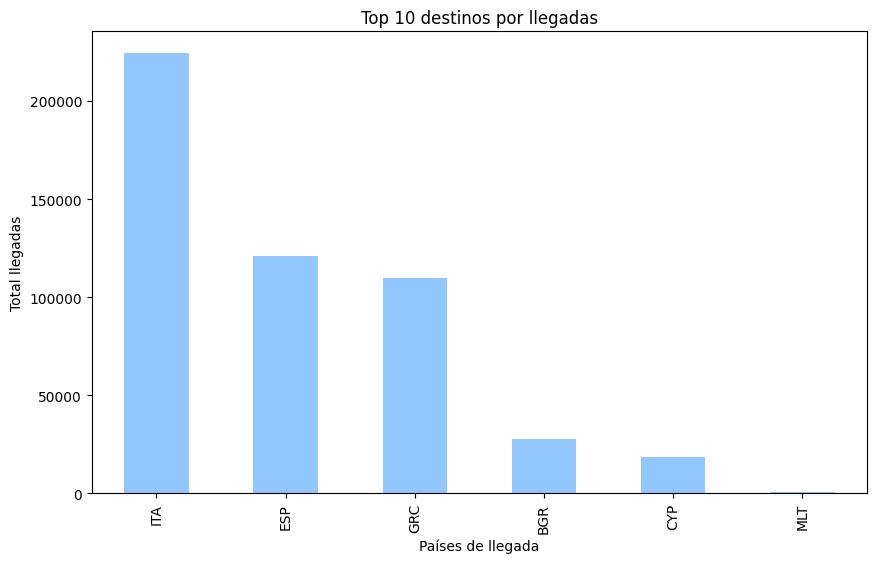

In [ ]:
top_dest.plot(kind='bar', figsize=(10,6), title='Top 10 destinos por llegadas') 
# kind='bar' - Tipo de gráfico: barras verticales
# figsize=(10, 6) - Tamaño de la figura en pulgadas: 10 Ancho, 6 Alto
# title='Top 10 destinos por llegadas' - Título del gráfico
plt.ylabel('Total llegadas') #Titulo eje Y
plt.xlabel("Países de llegada")
plt.show()

### 🔹 Top 10 países de origen (barras horizontales)

In [68]:
top_origin = df_arrivals.groupby('ISO3 - Country of origin')['Arrivals'].sum().sort_values(ascending=False).head(10)


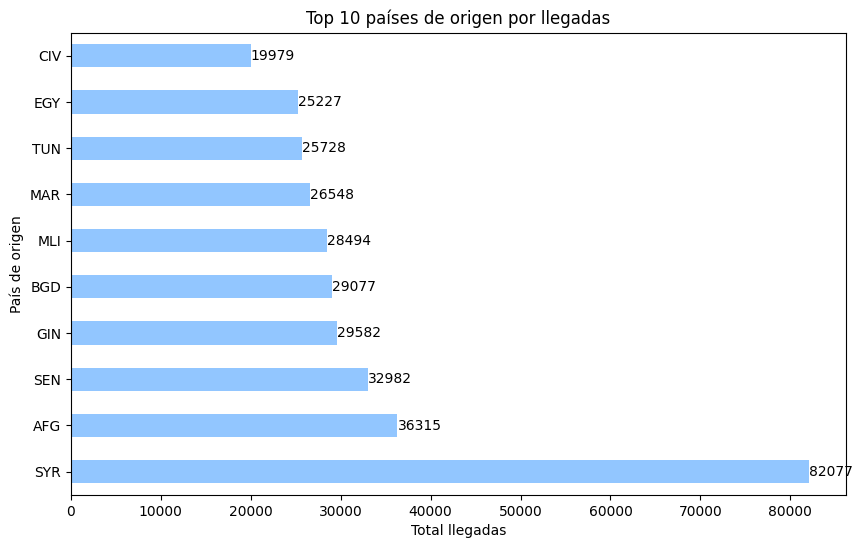

In [71]:
ax = top_origin.plot(
    kind='barh',
    figsize=(10,6),
    title='Top 10 países de origen por llegadas',
    )
ax.bar_label(ax.containers[0])
plt.ylabel('País de origen')
plt.xlabel('Total llegadas')



plt.show()

### 🔹 Gráfico circular (pie chart)

C:\Users\amval\AppData\Local\Temp\ipykernel_7936\573205823.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  top_dest.head(5).plot(


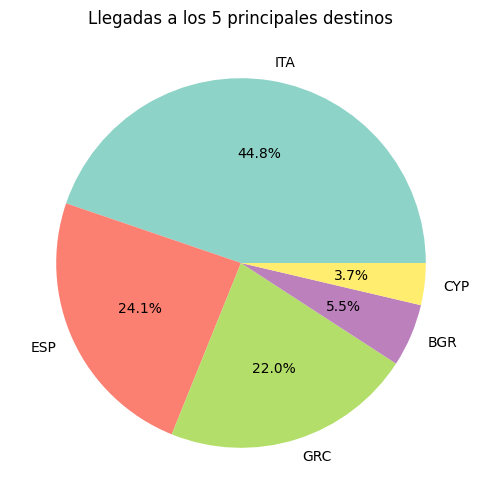

In [72]:
top_dest.head(5).plot(
    kind='pie', 
    figsize=(6,6),
    autopct='%1.1f%%',
    title='Llegadas a los 5 principales destinos',
    colormap='Set3')
plt.ylabel('')
plt.show()

## 4. 📈 Visualización temporal

### 🔹 Evolución mensual de llegadas totales

In [73]:
monthly = df_arrivals.groupby('Month')['Arrivals'].sum()


In [74]:
monthly

Month
1     24623
2     27286
3     31526
4     32064
5     26414
6     36610
7     52223
8     67398
9     63441
10    58448
11    47498
12    34044
Name: Arrivals, dtype: object

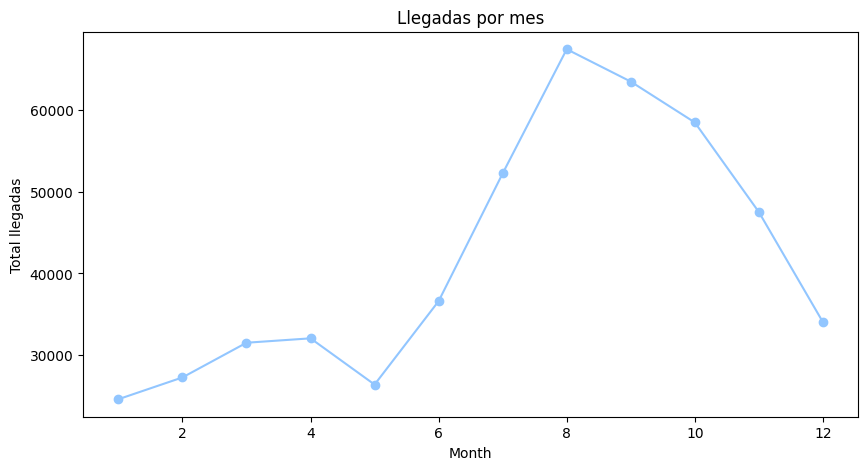

In [75]:
monthly.plot(kind='line', marker='o', figsize=(10,5), title='Llegadas por mes')
plt.ylabel('Total llegadas')
plt.show()

In [76]:
#Creamos un df para 20233 y otro para 2024 con la suma de llegadas para utilizarlos en gráficos
monthly_2023 = df_arrivals[df_arrivals['Year'] == 2023].groupby('Month')['Arrivals'].sum()
monthly_2024 = df_arrivals[df_arrivals['Year'] == 2024].groupby('Month')['Arrivals'].sum()


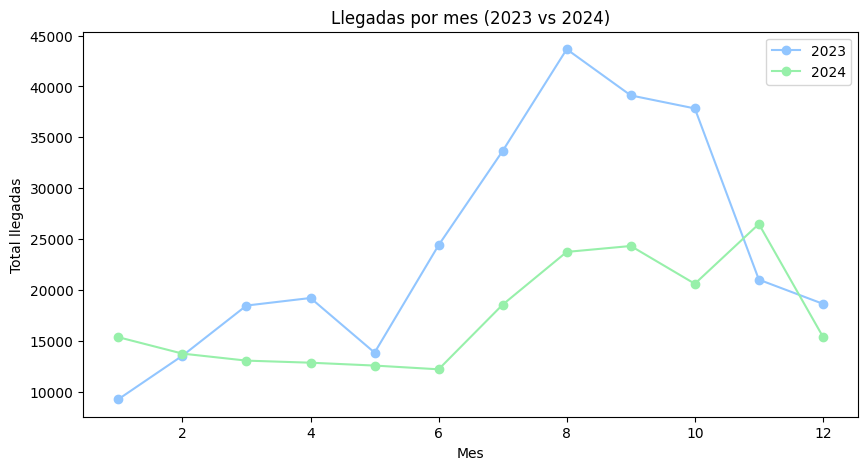

In [77]:
plt.figure(figsize=(10,5))
plt.plot(monthly_2023.index, monthly_2023.values, marker='o', label='2023')
plt.plot(monthly_2024.index, monthly_2024.values, marker='o', label='2024')
plt.title('Llegadas por mes (2023 vs 2024)')
plt.ylabel('Total llegadas')
plt.xlabel('Mes')
plt.legend()
plt.show()

### 🔹 Evolución mensual de llegadas a España (ESP)

In [78]:
esp = df_arrivals[df_arrivals['ISO3 - Country of arrival']=='ESP'].groupby(['Year', 'Month'])['Arrivals'].sum().unstack(level=0)


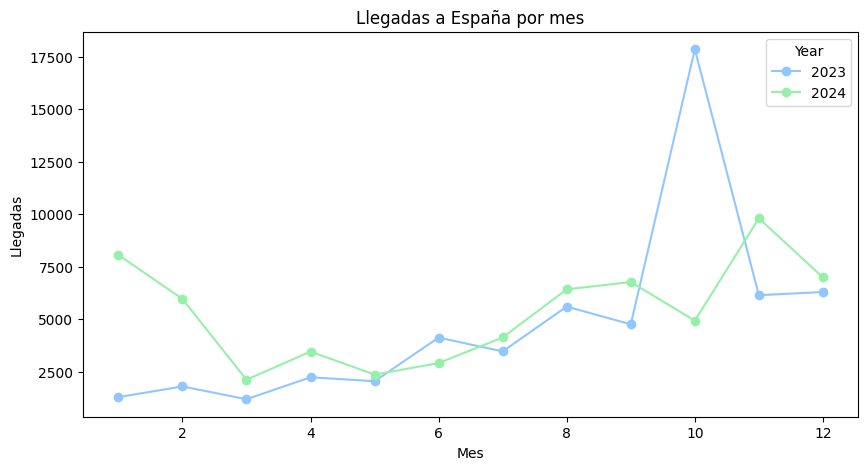

In [79]:
esp.plot(kind='line', marker='o', figsize=(10,5), title='Llegadas a España por mes')
plt.ylabel('Llegadas')
plt.xlabel('Mes')
plt.show()

### 🔹 Comparación España vs Italia

In [80]:
comp = df_arrivals[df_arrivals['ISO3 - Country of arrival'].isin(['ESP','ITA'])].groupby(['Month','ISO3 - Country of arrival'])['Arrivals'].sum().unstack()


In [81]:
comp

ISO3 - Country of arrival,ESP,ITA
Month,,
1,9359,7221
2,7770,11766
3,3314,20124
4,5700,19227
5,4415,13130
6,7044,20066
7,7603,30885
8,12031,34199
9,11535,26894


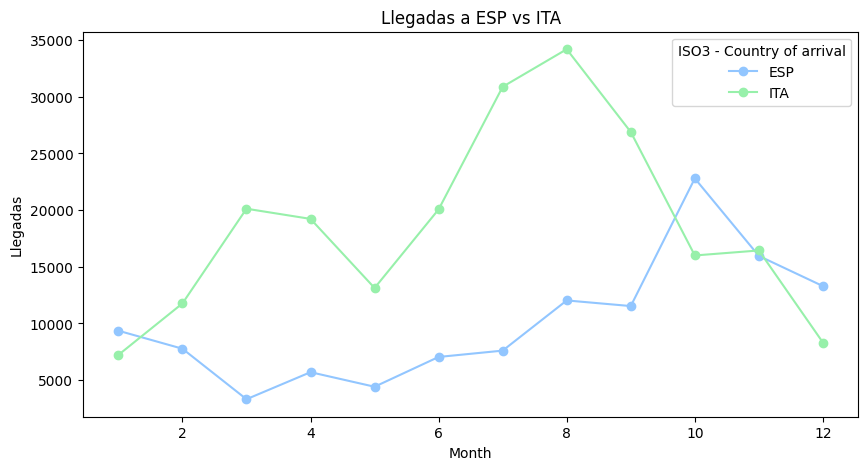

In [82]:
comp.plot(kind='line', marker='o', figsize=(10,5), title='Llegadas a ESP vs ITA')
plt.ylabel('Llegadas')
plt.show()

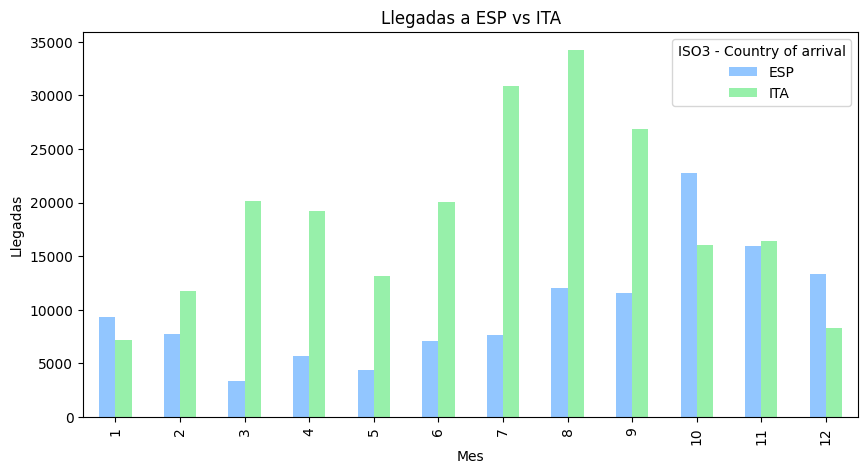

In [83]:
comp.plot(kind='bar', stacked=False, figsize=(10,5), title='Llegadas a ESP vs ITA')
plt.ylabel('Llegadas')
plt.xlabel('Mes')
plt.show()

### 🔹 Llegadas por trimestre

In [84]:
df_arrivals['Quarter'] = pd.cut(df_arrivals['Month'], bins=[0,3,6,9,12], labels=['Q1','Q2','Q3','Q4'])


In [85]:
qsum = df_arrivals.groupby(['Year', 'Quarter'])['Arrivals'].sum().unstack(level=0)


C:\Users\amval\AppData\Local\Temp\ipykernel_7936\2888589816.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  qsum = df_arrivals.groupby(['Year', 'Quarter'])['Arrivals'].sum().unstack(level=0)


In [86]:
qsum

Year,2023,2024
Quarter,,
Q1,41273,42162
Q2,57460,37628
Q3,116441,66621
Q4,77492,62498


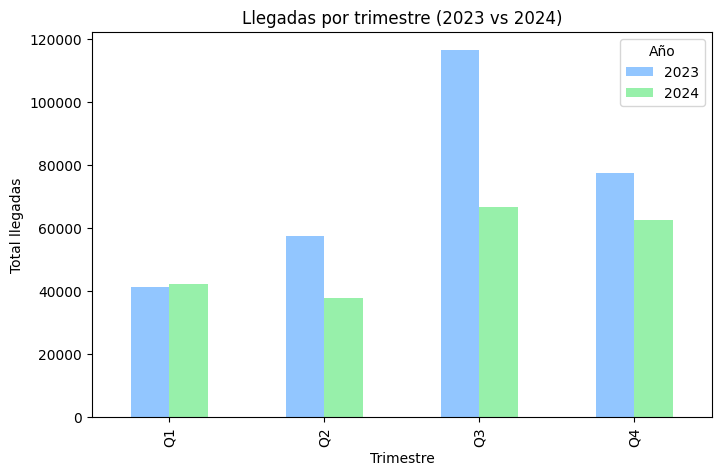

In [92]:
qsum.plot(kind='bar', figsize=(8,5), title='Llegadas por trimestre (2023 vs 2024)')
plt.ylabel('Total llegadas')
plt.xlabel('Trimestre')
plt.legend(title='Año')
plt.show()


## 5. 🔗 Visualización multivariada

### 🔹 Heatmap Origen vs Destino (top 10)

In [101]:
pivot = df_arrivals.pivot_table(index='ISO3 - Country of origin', columns='ISO3 - Country of arrival',
                       values='Arrivals', aggfunc='sum', fill_value=0)

C:\Users\amval\AppData\Local\Temp\ipykernel_7936\3692733793.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pivot = df_arrivals.pivot_table(index='ISO3 - Country of origin', columns='ISO3 - Country of arrival',


In [102]:
pivot

ISO3 - Country of arrival,BGR,CYP,ESP,GRC,ITA,MLT
ISO3 - Country of origin,,,,,,
AFG,7511,1185,15,23563,4041,0
AGO,0,0,4,29,1,0
AZE,0,0,0,2,13,0
BDI,0,80,1,0,0,0
BEN,0,0,123,3,2184,0
...,...,...,...,...,...,...
VNM,0,10,0,0,0,0
XXA,0,10,0,0,0,0
YEM,0,65,63,2287,178,0


In [104]:
top_origins = pivot.sum(axis=1).sort_values(ascending=False).head(10).index #suma cada fila: total salidas por país de origen
top_origins


Index(['SYR', 'AFG', 'SEN', 'GIN', 'BGD', 'MLI', 'MAR', 'TUN', 'EGY', 'CIV'], dtype='object', name='ISO3 - Country of origin')

In [105]:
top_destins = pivot.sum(axis=0).sort_values(ascending=False).head(10).index
top_destins#suma cada columna: total de llegadas por país destino

Index(['ITA', 'ESP', 'GRC', 'BGR', 'CYP', 'MLT'], dtype='object', name='ISO3 - Country of arrival')

In [106]:
subset = pivot.loc[top_origins, top_destins] #filtra el conjunto pivot

In [107]:
subset

ISO3 - Country of arrival,ITA,ESP,GRC,BGR,CYP,MLT
ISO3 - Country of origin,,,,,,
SYR,22648,629,33459,14862,10380,99
AFG,4041,15,23563,7511,1185,0
SEN,2574,30345,63,0,0,0
GIN,21999,7102,393,0,60,28
BGD,27058,241,1078,0,350,350
MLI,7763,20599,127,0,5,0
MAR,695,22869,446,2533,5,0
TUN,25645,36,42,0,5,0
EGY,15883,25,8696,356,220,47


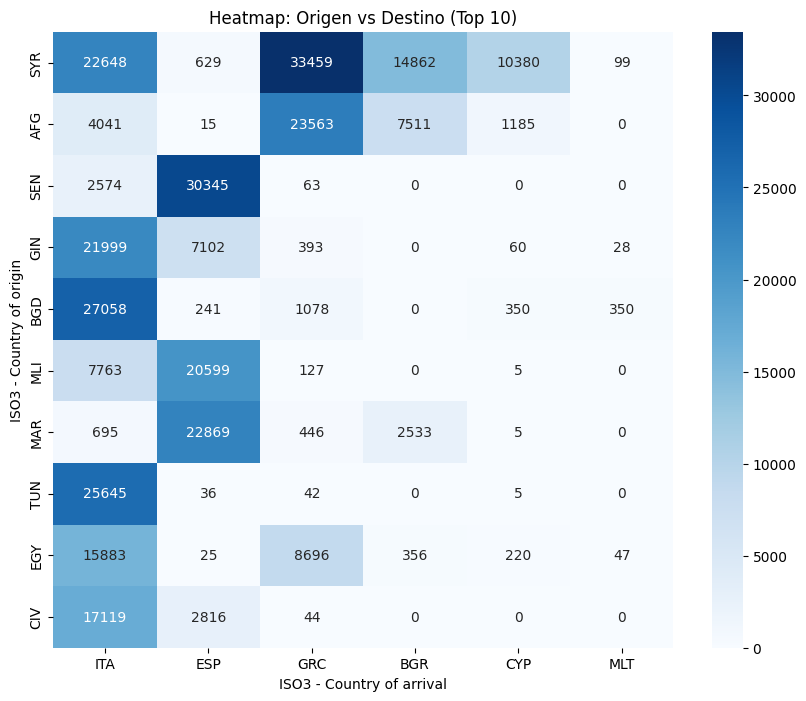

In [108]:
plt.figure(figsize=(10,8))
sns.heatmap(subset, annot=True, fmt='.0f', cmap='Blues')
plt.title('Heatmap: Origen vs Destino (Top 10)')
plt.show()

### 🔹 Barras apiladas por trimestre y destino

In [109]:
stacked = df_arrivals.groupby(['Quarter','ISO3 - Country of arrival'])['Arrivals'].sum().unstack().fillna(0)


C:\Users\amval\AppData\Local\Temp\ipykernel_7936\898593727.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stacked = df_arrivals.groupby(['Quarter','ISO3 - Country of arrival'])['Arrivals'].sum().unstack().fillna(0)
C:\Users\amval\AppData\Local\Temp\ipykernel_7936\898593727.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  stacked = df_arrivals.groupby(['Quarter','ISO3 - Country of arrival'])['Arrivals'].sum().unstack().fillna(0)


In [110]:
stacked.head()

ISO3 - Country of arrival,BGR,CYP,ESP,GRC,ITA,MLT
Quarter,,,,,,
Q1,3336,6100,20443,14376,39111,69
Q2,5961,4360,17159,15045,52423,140
Q3,13945,3300,31169,42505,91978,165
Q4,4284,4607,52051,38047,40757,244


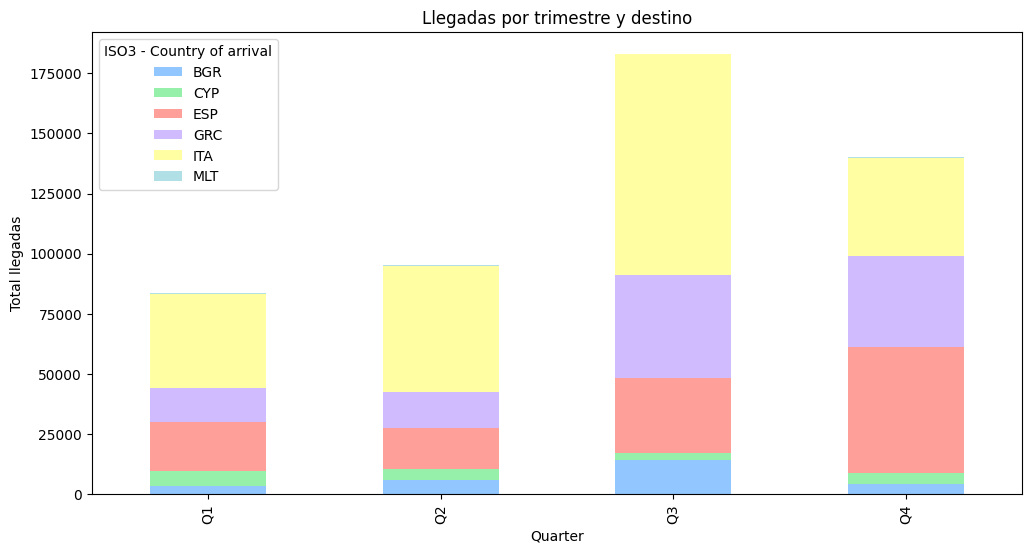

In [111]:
stacked.plot(kind='bar', stacked=True, figsize=(12,6), title='Llegadas por trimestre y destino')
plt.ylabel('Total llegadas')
plt.show()

## 6. 🎯 Ejercicios integrados

### 🔹 Top 5 rutas (origen-destino)

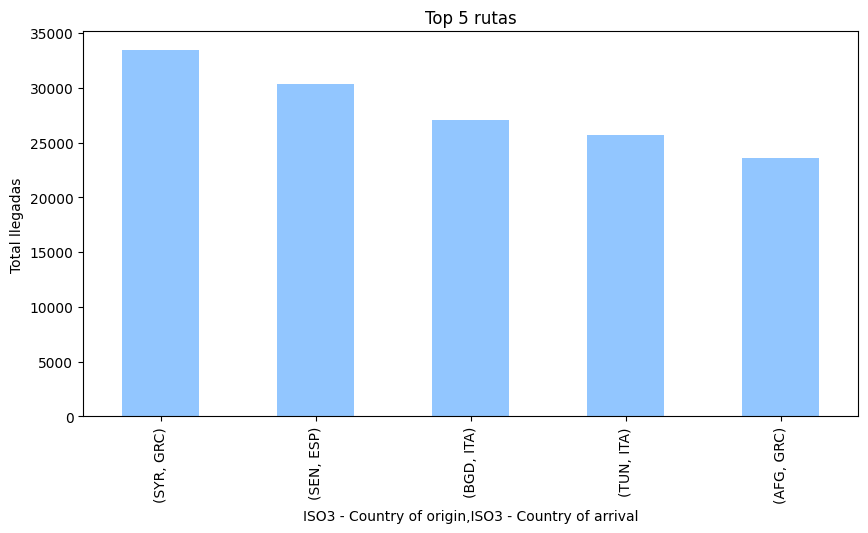

In [112]:
routes = df_arrivals.groupby(['ISO3 - Country of origin','ISO3 - Country of arrival'])['Arrivals'].sum().sort_values(ascending=False).head(5)
routes.plot(kind='bar', figsize=(10,5), title='Top 5 rutas')
plt.ylabel('Total llegadas')
plt.show()

### 🔹 Llegadas a España por mes

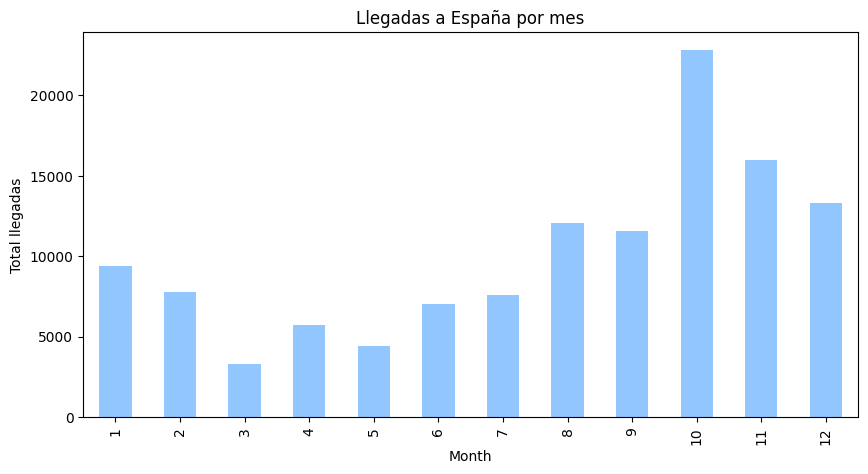

In [113]:
df_arrivals[df_arrivals['ISO3 - Country of arrival']=='ESP'].groupby('Month')['Arrivals'].sum().plot(kind='bar', figsize=(10,5), title='Llegadas a España por mes')
plt.ylabel('Total llegadas')
plt.show()

### 🔹 Top 3 orígenes por destino (ejemplo Italia)

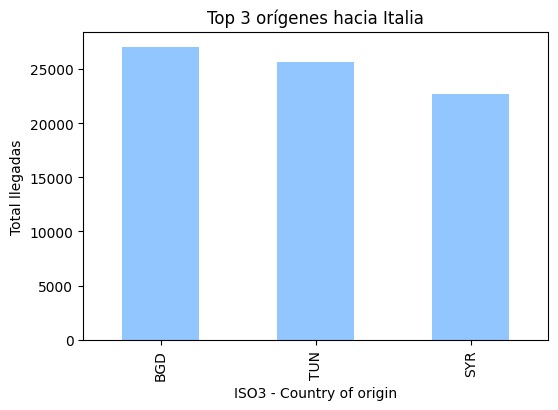

In [114]:
ita = df_arrivals[df_arrivals['ISO3 - Country of arrival']=='ITA']
top3 = ita.groupby('ISO3 - Country of origin')['Arrivals'].sum().sort_values(ascending=False).head(3)
top3.plot(kind='bar', figsize=(6,4), title='Top 3 orígenes hacia Italia')
plt.ylabel('Total llegadas')
plt.show()

In [115]:
# Asegurarse de que monthly_2023 y monthly_2024 sean numéricos
monthly_2023 = monthly_2023.astype(float)
monthly_2024 = monthly_2024.astype(float)

In [116]:
# Calcular variación porcentual mes a mes respecto al año anterior
pct_change = ((monthly_2024 - monthly_2023) / monthly_2023) * 100


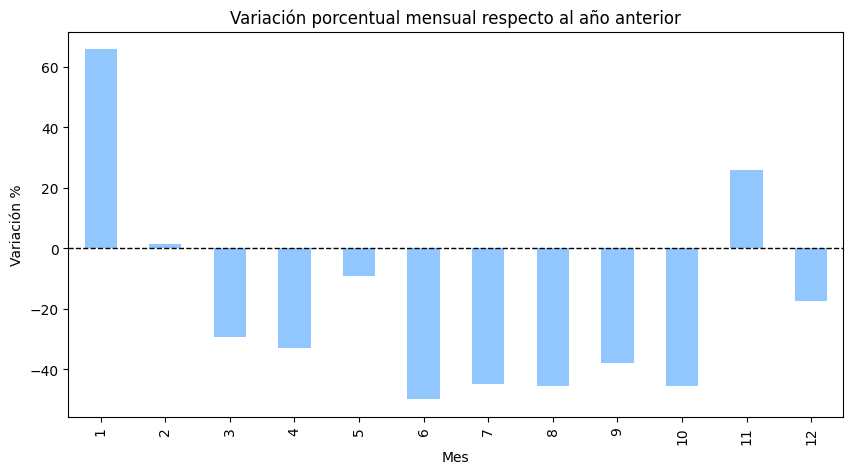

In [121]:
# Graficar
pct_change.plot(kind='bar', figsize=(10,5), title='Variación porcentual mensual respecto al año anterior')
plt.ylabel('Variación %')
plt.xlabel('Mes')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.show()

## 7. 🏁 Mini proyecto final

Filtrar el segundo semestre (julio–diciembre), agrupar por destino y mostrar los 5 principales con gráfico de barras.

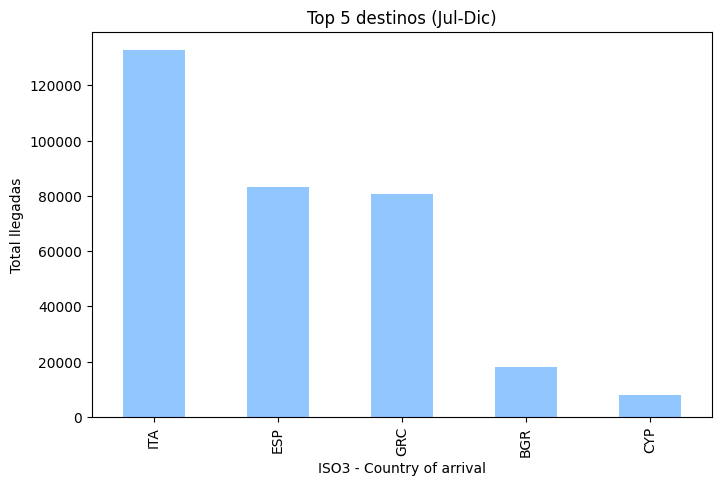

In [122]:
h2 = df_arrivals[df_arrivals['Month'].between(7,12)]
summary = h2.groupby('ISO3 - Country of arrival')['Arrivals'].sum().sort_values(ascending=False).head(5)
summary.plot(kind='bar', figsize=(8,5), title='Top 5 destinos (Jul-Dic)')
plt.ylabel('Total llegadas')
plt.show()

## ✅ Conclusiones

- Se han visualizado llegadas por destino y origen.
- Se ha explorado la evolución temporal de las llegadas.
- Se han combinado varias variables en heatmaps y gráficos apilados.

Este cuaderno está diseñado para iniciarse en la visualización con Pandas y Matplotlib/Seaborn.

## 📚 Recursos adicionales
- [Plotly Express](https://plotly.com/python/plotly-express/)
- [Graph Objects](https://plotly.com/python/graph-objects/)
- [Galería de ejemplos](https://plotly.com/python/)